In [127]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset 
data = pd.read_excel("01train.xlsx")
data.head() # Show data 


,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [128]:
#Step (2)-1: Data observations
#統計各個特徵值大小的分布狀況
#此步驟目的為判斷特徵是否有不合理的值、離群值影響的程度(看標準差)、各特徵的量值尺度是否需做scaling...等等
data.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


In [129]:
#Step (2)-2:特徵相關性(I) (特徵太多不建議用這個功能，可使用(II))
'''
import seaborn as sns;
sns.pairplot(data, hue='Underclocking')
'''

"\nimport seaborn as sns;\nsns.pairplot(data, hue='Underclocking')\n"

In [130]:
#delete outliers
name_list_outlier = ['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','外型平均曲率','上網頻率指標','通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']
name_pre_outlier = ['Mobile Screen Temperature (Average)','Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Charging Time Index','Mobile Phone Battery Level','CPU Running Grade','Mobile Phone Shell/Envelope Index','Average Curvature of Appearance','Internet Frequency Index','Call Frequency Index','New/Used/Old','Content Capacity Ratio','CPU Performance Rating']

for i, name in enumerate(name_list_outlier):
    print(name)
    print("Shape Of The Before Ouliers: ", data[name].shape)
    
    # Calculate IQR
    Q1 = np.percentile(data[name], 25)
    Q3 = np.percentile(data[name], 75)
    IQR = Q3 - Q1
    n = 1.5

    # Define outlier range
    lower_bound = Q1 - n * IQR
    upper_bound = Q3 + n * IQR

    # Filter outliers
    filtered_entries = ((data[name] >= lower_bound) & (data[name] <= upper_bound))
    data  = data[filtered_entries]
    print("Shape Of The After Ouliers: ",data[name].shape)


手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3783,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3783,)
Shape Of The After Ouliers:  (3528,)
充電時間指標
Shape Of The Before Ouliers:  (3528,)
Shape Of The After Ouliers:  (3504,)
手機電池電量
Shape Of The Before Ouliers:  (3504,)
Shape Of The After Ouliers:  (3504,)
CPU跑分階級
Shape Of The Before Ouliers:  (3504,)
Shape Of The After Ouliers:  (2870,)
手機外殼/包膜指標
Shape Of The Before Ouliers:  (2870,)
Shape Of The After Ouliers:  (2860,)
外型平均曲率
Shape Of The Before Ouliers:  (2860,)
Shape Of The After Ouliers:  (2765,)
上網頻率指標
Shape Of The Before Ouliers:  (2765,)
Shape Of The After Ouliers:  (2748,)
通話頻率指標
Shape Of The Before Ouliers:  (2748,)
Shape Of The After Ouliers:  (2740,)
新機/二手/老舊
Shape Of The Before Ouliers:  (2740,)
Shape Of The After Ouliers:  

In [131]:
#Step (2)-1: Data observations
#統計各個特徵值大小的分布狀況
#此步驟目的為判斷特徵是否有不合理的值、離群值影響的程度(看標準差)、各特徵的量值尺度是否需做scaling...等等
data.describe()


,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.0,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.0,2555.000000
mean,41.617539,48.499804,53.966349,571.027821,0.229848,74.795148,3.0,0.101973,0.008650,2692.677366,2329.708791,0.324853,0.902017,1.0,0.439922
std,12.136904,12.572320,11.275630,390.727791,0.230330,14.207783,0.0,0.051734,0.095690,1611.126794,1608.372665,0.529613,0.111765,0.0,0.496475
min,15.601610,17.166667,19.207986,2.806544,0.000000,47.889610,3.0,0.016377,-0.249800,11.370000,0.000000,0.000000,0.549146,1.0,0.000000
25%,32.119048,38.785714,46.689265,260.750000,0.032609,62.319625,3.0,0.058849,-0.055764,1368.500000,1025.000000,0.000000,0.845747,1.0,0.000000
50%,40.650027,48.309524,54.633333,456.100000,0.156250,75.757576,3.0,0.085901,0.003955,2521.000000,2150.000000,0.000000,0.950284,1.0,0.000000
75%,50.392857,58.023810,61.393333,817.100000,0.380952,87.460295,3.0,0.143599,0.068670,3832.000000,3455.073327,1.000000,0.988579,1.0,1.000000
max,75.619048,79.547619,86.000000,1768.000000,0.883117,100.000000,3.0,0.261862,0.278179,7313.000000,7029.000000,2.000000,1.000000,1.0,1.000000


In [132]:
#Step (2)-3:特徵相關性(II) (建議用這個功能，將關聯性做量化)
#關聯性的量值介於-1~1之間，負值表示負相關，正值表示正相關;故絕對量值越大表示特徵之間的關聯性越強
#特徵關聯性的檢查對於"迴歸類"問題相當重要
'''
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) #各參數代表的意思請查閱seaborn.heatmap官網的說明
plt.title('Feature Correlation Heatmap')
plt.show()
'''

"\nimport matplotlib.pyplot as plt\ncorr_matrix = data.corr()\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) #各參數代表的意思請查閱seaborn.heatmap官網的說明\nplt.title('Feature Correlation Heatmap')\nplt.show()\n"

In [133]:
#Step (2)-4:Check data imbalance
class_distribution = data['Underclocking'].value_counts() #指定data中的label欄位，進行各類別數量的統計
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Underclocking
0    1431
1    1124
Name: count, dtype: int64


In [134]:
from sklearn.preprocessing import StandardScaler

# 定義需要標準化的欄位
columns_to_standardize = ['手機螢幕溫度(平均)', '手機螢幕溫度(最大)', '手機背蓋溫度(平均)', '平均APP運作指標/小時', '充電時間指標', '手機電池電量', 'CPU跑分階級', '手機外殼/包膜指標', '外型平均曲率', '上網頻率指標', '通話頻率指標', '新機/二手/老舊', '內容容量比率', 'CPU效能等級']

# 初始化標準化物件
scaler = StandardScaler()

# 將資料標準化
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# 顯示標準化後的資料
print(data.head())


   手機螢幕溫度(平均)  手機螢幕溫度(最大)  手機背蓋溫度(平均)  平均APP運作指標/小時    充電時間指標    手機電池電量  \
0    1.414820    1.219865   -0.953838     -0.870413 -0.826690 -0.953167   
2   -0.901780   -0.937601   -1.535010      0.678896 -0.003464 -0.412809   
3   -0.782766   -0.551190    0.820246      0.045494 -0.603334 -1.431882   
4   -0.033232    0.071994   -0.131254      0.288933 -0.682288 -0.906184   
7   -0.559083   -0.806903   -0.222915      0.117937 -0.809300  0.038547   

   CPU跑分階級  手機外殼/包膜指標    外型平均曲率    上網頻率指標    通話頻率指標  新機/二手/老舊    內容容量比率  \
0      0.0  -0.934187 -0.479039  2.199092  2.300471 -0.613498  0.870092   
2      0.0   0.377613  0.241103 -0.008195 -0.080149 -0.613498  0.876855   
3      0.0   1.000371  0.007060 -1.446338 -1.448772 -0.613498  0.151710   
4      0.0  -0.090595 -0.404931  0.052348 -0.204414 -0.613498  0.039317   
7      0.0  -1.082016 -1.400108 -1.122277 -1.025839  1.275042 -0.010867   

   CPU效能等級  Underclocking  
0      0.0              0  
2      0.0              0  
3      0.0    

In [135]:
#Step (3): 用X儲存features, Y為labels(nderclocking)
X_all=data.iloc[:,:-1].values #把data中第一個column到最後一個column之前的data存入X_all(特徵)
Y_all=data['Underclocking'].values #指定名稱為"nderclocking"的那個column存入Y_all(label)

print(X_all) #查看一下特徵的data
print(Y_all) #查看一下答案的data

[[ 1.41482014  1.21986477 -0.95383765 ... -0.61349834  0.87009165
   0.        ]
 [-0.90178036 -0.93760144 -1.5350104  ... -0.61349834  0.87685514
   0.        ]
 [-0.78276563 -0.55118958  0.82024636 ... -0.61349834  0.15170973
   0.        ]
 ...
 [-0.09994433 -0.07196311 -0.39263574 ... -0.61349834  0.43800148
   0.        ]
 [ 2.39392309  2.08360893 -1.52804951 ... -0.61349834  0.53715632
   0.        ]
 [-0.08817155 -0.11363498  0.3530709  ... -0.61349834 -1.54569414
   0.        ]]
[0 0 1 ... 0 0 0]


In [136]:
'''
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 分離特徵和標籤
X_all = data.iloc[:, :-1].values
Y_all = data['Underclocking'].values

# 切分訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

# 定義SVM模型
svm_model = SVC()

# 定義參數範圍
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']}

# 使用GridSearchCV進行5-fold Grid Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, Y_train)

# 獲得最佳參數
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 繪製C、gamma、kernal的圖
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot C values
C_values = [params['C'] for params in grid_search.cv_results_['params']]
axs[0].plot(C_values, grid_search.cv_results_['mean_test_score'], marker='o')
axs[0].set_xlabel('C Value')
axs[0].set_ylabel('Mean Test Score')
axs[0].set_title('C Value vs Mean Test Score')

# Plot gamma values
gamma_values = [params['gamma'] for params in grid_search.cv_results_['params']]
axs[1].plot(gamma_values, grid_search.cv_results_['mean_test_score'], marker='o')
axs[1].set_xlabel('Gamma Value')
axs[1].set_ylabel('Mean Test Score')
axs[1].set_title('Gamma Value vs Mean Test Score')

# Plot kernel values
kernel_values = [params['kernel'] for params in grid_search.cv_results_['params']]
axs[2].bar(kernel_values, grid_search.cv_results_['mean_test_score'])
axs[2].set_xlabel('Kernel')
axs[2].set_ylabel('Mean Test Score')
axs[2].set_title('Kernel vs Mean Test Score')

plt.tight_layout()
plt.show()
'''

'\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.svm import SVC\nimport matplotlib.pyplot as plt\n\n# 分離特徵和標籤\nX_all = data.iloc[:, :-1].values\nY_all = data[\'Underclocking\'].values\n\n# 切分訓練集和測試集\nX_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)\n\n# 定義SVM模型\nsvm_model = SVC()\n\n# 定義參數範圍\nparam_grid = {\'C\': [0.1, 1, 10, 100],\n              \'gamma\': [1, 0.1, 0.01, 0.001],\n              \'kernel\': [\'linear\', \'rbf\']}\n\n# 使用GridSearchCV進行5-fold Grid Cross Validation\ngrid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2)\ngrid_search.fit(X_train, Y_train)\n\n# 獲得最佳參數\nbest_params = grid_search.best_params_\nprint("Best Parameters:", best_params)\n\n# 繪製C、gamma、kernal的圖\nfig, axs = plt.subplots(1, 3, figsize=(15, 5))\n\n# Plot C values\nC_values = [params[\'C\'] for params in grid_search.cv_results_[\'params\']]\naxs[0].plot(C_values, grid_search.cv_results_[\'mean_test_score\'], 

In [137]:

'''
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 分離特徵和標籤
X_all = data.iloc[:, :-1].values
Y_all = data['Underclocking'].values

# Initialize StratifiedKFold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the SVM classifier
svm_clf = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform grid search cross validation
grid_search.fit(X_all, Y_all)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Plot C, gamma, kernel values
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot C values
C_values = [params['C'] for params in grid_search.cv_results_['params']]
axs[0].plot(C_values, grid_search.cv_results_['mean_test_score'], marker='o')
axs[0].set_xlabel('C Value')
axs[0].set_ylabel('Mean Test Score')
axs[0].set_title('C Value vs Mean Test Score')

# Plot gamma values
gamma_values = [params['gamma'] for params in grid_search.cv_results_['params']]
axs[1].plot(gamma_values, grid_search.cv_results_['mean_test_score'], marker='o')
axs[1].set_xlabel('Gamma Value')
axs[1].set_ylabel('Mean Test Score')
axs[1].set_title('Gamma Value vs Mean Test Score')

# Plot kernel values
kernel_values = [params['kernel'] for params in grid_search.cv_results_['params']]
axs[2].bar(kernel_values, grid_search.cv_results_['mean_test_score'])
axs[2].set_xlabel('Kernel')
axs[2].set_ylabel('Mean Test Score')
axs[2].set_title('Kernel vs Mean Test Score')

plt.tight_layout()
plt.show()
'''

'\nfrom sklearn.model_selection import GridSearchCV, StratifiedKFold\nfrom sklearn.svm import SVC\nimport matplotlib.pyplot as plt\n\n# 分離特徵和標籤\nX_all = data.iloc[:, :-1].values\nY_all = data[\'Underclocking\'].values\n\n# Initialize StratifiedKFold with 5 folds\nstratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# Initialize the SVM classifier\nsvm_clf = SVC()\n\n# Define the parameter grid for GridSearchCV\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\']\n}\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=stratified_kfold, scoring=\'accuracy\', verbose=2, n_jobs=-1)\n\n# Perform grid search cross validation\ngrid_search.fit(X_all, Y_all)\n\n# Print the best parameters and best score\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Score:", grid_search.best_score_)\n\n# Plot C, gamma, kernel values\nfig, axs = plt.su

In [138]:

'''
from sklearn.model_selection import GridSearchCV, StratifiedKFold, validation_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 定義SVM模型
svm_model = SVC()

# 定義參數範圍
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', ]}

# 使用5-fold StratifiedKFold進行GridSearchCV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=kfold, verbose=2)
grid_search.fit(X_train, Y_train)

# 獲得最佳參數
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 繪製 validation curve
param_range = [0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    SVC(), X_train, Y_train, param_name="C", param_range=param_range,
    cv=kfold, scoring="accuracy", n_jobs=-1)

# 計算平均值和標準差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 繪製 validation curve 圖表
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVM")
plt.xlabel("C Value")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange", lw=lw)

plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.semilogx(param_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.show()
'''

'\nfrom sklearn.model_selection import GridSearchCV, StratifiedKFold, validation_curve\nfrom sklearn.svm import SVC\nimport matplotlib.pyplot as plt\n\n# 定義SVM模型\nsvm_model = SVC()\n\n# 定義參數範圍\nparam_grid = {\'C\': [0.1, 1, 10, 100],\n              \'gamma\': [1, 0.1, 0.01, 0.001],\n              \'kernel\': [\'linear\', \'rbf\', ]}\n\n# 使用5-fold StratifiedKFold進行GridSearchCV\nkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\ngrid_search = GridSearchCV(svm_model, param_grid, cv=kfold, verbose=2)\ngrid_search.fit(X_train, Y_train)\n\n# 獲得最佳參數\nbest_params = grid_search.best_params_\nprint("Best Parameters:", best_params)\n\n# 繪製 validation curve\nparam_range = [0.1, 1, 10, 100]\ntrain_scores, test_scores = validation_curve(\n    SVC(), X_train, Y_train, param_name="C", param_range=param_range,\n    cv=kfold, scoring="accuracy", n_jobs=-1)\n\n# 計算平均值和標準差\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_score

In [144]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 定义SVM模型
svm_model = SVC(C=1.36, gamma=0.12, kernel='rbf')

# 使用模型对训练集进行训练
svm_model.fit(X_train, Y_train)

# 使用模型对测试集进行预测
Y_pred = svm_model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# 输出分类报告
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

# 输出混淆矩阵
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.6516634050880626
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70       267
           1       0.68      0.52      0.59       244

    accuracy                           0.65       511
   macro avg       0.66      0.65      0.64       511
weighted avg       0.66      0.65      0.65       511

Confusion Matrix:
 [[207  60]
 [118 126]]


Fitting 5 folds for each of 1111 candidates, totalling 5555 fits
[CV] END ......................C=0.5, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.06, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.06, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.06, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.06, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.06, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.07, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=

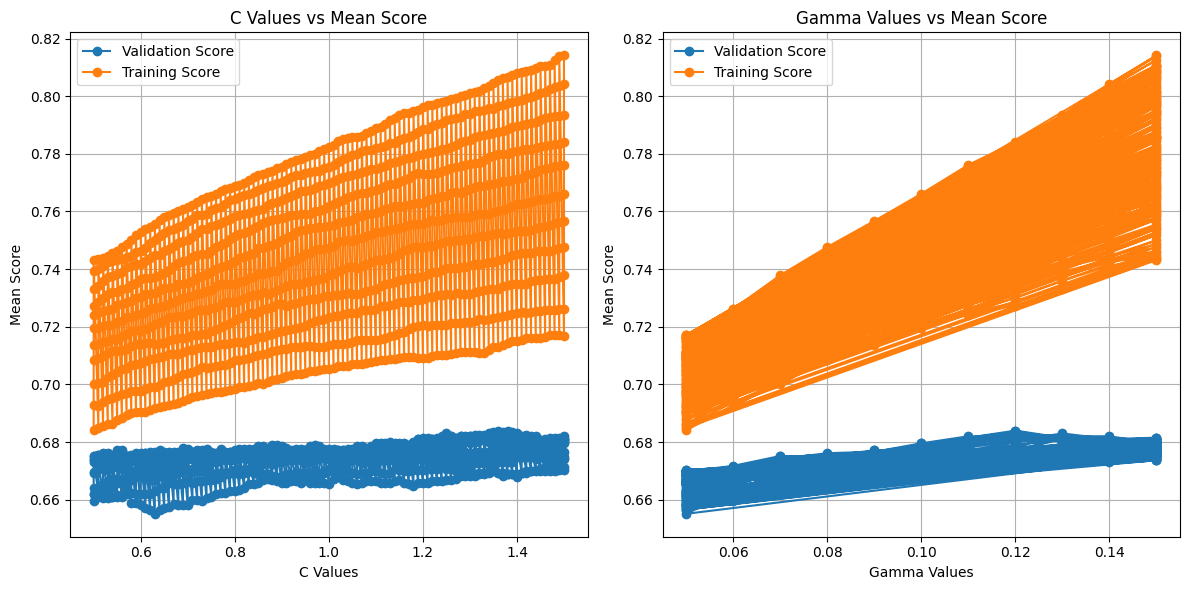

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 定义SVM模型
svm_model = SVC()

# 定义参数范围
param_grid = {'C': [round(i, 2) for i in np.arange(0.5, 1.51, 0.01)],
              'gamma': [round(i, 2) for i in np.arange(0.05, 0.16, 0.01)],
              'kernel': ['rbf']}

# 使用GridSearchCV进行5-fold Grid Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, return_train_score=True)
grid_search.fit(X_train, Y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 绘制 C 值对 accuracy 的图
C_values = [params['C'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.figure(figsize=(12, 6))

# Plot C 值对 validation score 的图
plt.subplot(1, 2, 1)
plt.plot(C_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(C_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('C Values')
plt.ylabel('Mean Score')
plt.title('C Values vs Mean Score')
plt.legend()
plt.grid(True)

# 绘制 gamma 值对 validation score 的图
gamma_values = [params['gamma'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.subplot(1, 2, 2)
plt.plot(gamma_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(gamma_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('Gamma Values')
plt.ylabel('Mean Score')
plt.title('Gamma Values vs Mean Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
